In [2]:
from numpy.random import randn, seed
from numpy import cov
seed(1)
data1=20*randn(1000)+100
data2=data1+(10*randn(1000)+50)
# 분산이 크면 중요변수 -> 변화가 크다
# 공분산이 크면 두개의 값의 변화가 긐다.
covariance=cov(data1,data2) # 공분산 
print(covariance)
from scipy.stats import pearsonr # 상관계수 : 피어슨(연속적), 스피어만(순서),캔들 
corr, _=pearsonr(data1,data2) 
print('Persons correlation: %.3f' % corr)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]
Persons correlation: 0.888


In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3),
                                     index=['a', 'b', 'c']),
                   'two' : pd.Series(np.random.randn(4),
                                     index=['a', 'b', 'c', 'd']),
                   'three' : pd.Series(np.random.randn(3),
                                     index=['b', 'c', 'd'])})

In [6]:
print(df.corr())
print(df.cov())

            one       two     three
one    1.000000 -0.675879 -1.000000
two   -0.675879  1.000000  0.109673
three -1.000000  0.109673  1.000000
            one       two     three
one    0.235642 -0.433151 -0.119760
two   -0.433151  1.188138  0.097508
three -0.119760  0.097508  0.443565


In [7]:
import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [9]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

In [12]:
# f문자열로 표현된 선형회귀 식
line= f'y={intercept:.2f}+{slope:.2f},r={r:.2f}'

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(x,y,linewidth=0,marker='s',label='Data points')
ax.plot(x,intercept+slope*x,label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white') # 범례
plt.show()

In [ ]:
import statsmodels.graphics.api as smg
import statsmodels.api as sm
hie_data = sm.datasets.randhie.load_pandas() # test data
corr_matrix=np.corrcoef(hie_data.data.T) # 상관계수 행렬 
smg.plot_corr(corr_matrix,xnames=hie_data.names) # 상관계수를 heatmap으로 출력
plt.show()

In [18]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
bias=100
X0,y,w= make_regression( # 속성, 독립변수, features
    n_samples=200,n_features=1,bias=bias,noise=10,coef=True,random_state=1
)
print(X0[:5,:])

X=sm.add_constant(X0)
print(X[:5,:])
y=y.reshape(len(y),1)
print(X.shape) # (200,2) statsmodels에서는 절편때문에 상수항을 추가
# 계수: 86.44794300545998
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]]
(200, 2)
86.44794300545998


In [21]:
import statsmodels.api as sm
# ordinary least square : 범용의 최소 제곱법
model=sm.OLS(y,X)
result=model.fit()
print(result.summary())
result.params
# 모델 평가기준 AIC, BIC(변수가 많으면 커지는 단점을 보완)
# 모델의 옵션을 변경하면 상황이 변화가 있을 때

# Omnibus : 전체 설명된 분산이 설명되지 않은 분산보다 유믜미 하게 큰가(0.05보다 작으면 설명되지 않은 분산이 유의미 하게 크다)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):          8.17e-182
Time:                        01:48:49   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([99.79150869, 86.96171201])

In [23]:
# 선형회귀 모델 만들기
Stock_Market = {'년도': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                '월': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                '이자율': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                '비고용율': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                '주가': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

In [43]:
# 수업내용
df=pd.DataFrame(Stock_Market)
X=df[['이자율','비고용율']]
Y=df['주가']

X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     주가   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.04e-11
Time:                        02:26:36   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.0

In [42]:
# 내가한것
x=np.array([Stock_Market['이자율'],Stock_Market['비고용율']]).T
y=np.array(Stock_Market['주가'])
model = sm.OLS(y,x)
result=model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2508.
Date:                Tue, 16 May 2023   Prob (F-statistic):                    1.10e-26
Time:                        02:24:46   Log-Likelihood:                         -136.70
No. Observations:                  24   AIC:                                      277.4
Df Residuals:                      22   BIC:                                      279.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
predictions=model.predict(X)
np.corrcoef(predictions,Y)

array([[1.        , 0.94743527],
       [0.94743527, 1.        ]])

In [ ]:
Y-predictions

In [ ]:
results=model
(results.resid)

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['Jarque-Bera','Chi^2 two-tail prob.','Skew','Kurtosis']
test=sms.jarque_bera(results.resid)
print(test)
lzip(name,test)

(1.550804902468136, 0.4605184074981622, -0.6123063611741041, 3.2261163035498464)


[('Jarque-Bera', 1.550804902468136),
 ('Chi^2 two-tail prob.', 0.4605184074981622),
 ('Skew', -0.6123063611741041),
 ('Kurtosis', 3.2261163035498464)]

In [71]:
# 문제
import pandas as pd
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
print(type(california))

<class 'sklearn.utils._bunch.Bunch'>


In [72]:
print(california.target)
print(california.data)
print(california.feature_names)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [73]:
dfX0_california=pd.DataFrame(california.data,columns=california.feature_names)
print(dfX0_california.head())
dfX_california=sm.add_constant(dfX0_california)
dfy_california=pd.DataFrame(california.target,columns=['MEDV'])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [74]:
print(dfy_california)

        MEDV
0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
...      ...
20635  0.781
20636  0.771
20637  0.923
20638  0.847
20639  0.894

[20640 rows x 1 columns]


In [75]:
# 위 데이터 선형회귀모델
# 수업내용
# dfX_california=dfX_california.iloc[:,:6] # 위도, 경도 제외
model=sm.OLS(dfy_california,dfX_california)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        03:22:15   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [ ]:
# 위 데이터 선형회귀모델
# 내가한거
model=sm.OLS(dfy_california,dfX_california).fit()
print_model=model.summary()
print(print_model)

In [76]:
# 상수 추가한거 제외하고
dfX_california.iloc[:,1:].corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [ ]:
import seaborn as sns
corr_california=dfX_california.iloc[:,1:].corr()
sns.heatmap(corr_california)

In [ ]:
sns.pairplot(dfX_california)
plt.show()

In [ ]:
df_california=pd.concat([dfX_california,dfy_california],axis=1)
sns.lmplot(x='AveRooms',y='MEDV',data=df_california)

In [ ]:
df_california.boxplot()
plt.show()

In [84]:
prediction=result.predict(dfX_california)
dfy_california['MEDV']-prediction

0        0.394350
1       -0.391606
2       -0.155571
3        0.171402
4        1.008413
           ...   
20635    0.647344
20636    0.217472
20637    0.751749
20638    0.527895
20639    0.378196
Length: 20640, dtype: float64

In [85]:
np.corrcoef(dfy_california['MEDV'],prediction)

array([[1.        , 0.77860946],
       [0.77860946, 1.        ]])

In [ ]:
result.resid
plt.plot(result.resid)
result.resid.plot()

ValueError: ignored

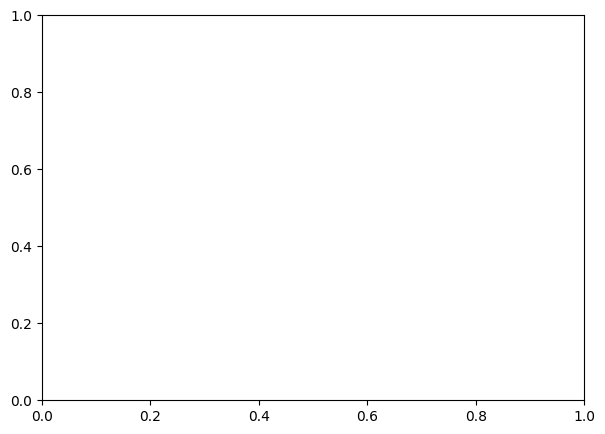

In [178]:
# 잔차의 histogram
f=plt.figure(figsize=(7,5))
ax=f.add_subplot(111)
ax.hist(dfy_california['MEDV']-prediction,bins=50)
plt.show()

In [ ]:
# Q-Q
from scipy.stats import probplot
f=plt.figure(figsize=(7,5))
ax=f.add_subplot(111)
probplot(dfy_california['MEDV']-prediction,plot=ax)
ax

In [ ]:
# 비용함수( cost function) => 최저로 => optimization
import scipy as sp
from scipy import special # 특별 상황을 표현하기 위한 함수

xx=np.linspace(-5,5,1000)
# 특별한 함수 0~1 => 높은 확률로 매칭가능: 0.5보다크면 참, 0.5보다 작으면 거짓
plt.plot(xx,1/(1+np.exp(-xx)),'r-',label='logistic function')
# error function
plt.plot(xx,special.erf(0.5*np.sqrt(np.pi)*xx),'g:',label='loss function')
# deep learning tanh가 사용됨 (-1~1)
plt.plot(xx,np.tanh(xx),'b--',label='hyper tangent')
plt.ylim([-1.1,1.1])
plt.legend(loc=2)
plt.xlabel('x')
plt.show()

In [ ]:
from sklearn.datasets import make_classification
# 변수는 한개, 분산여부, cluster당 몇개의 그룹만드는가
X0,y=make_classification(n_features=1,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state=4)

plt.scatter(X0,y,c=y,s=100,edgecolor='k',linewidth=2)

sns.displot(X0[y== 0,:],label='y=0')
sns.displot(X0[y== 1,:],label='y=1')
plt.ylim(-0.2,1.2)
plt.show()

In [96]:
X=sm.add_constant(X0)
logit_mod=sm.Logit(y,X) # 로지스틱 회귀 => 분류문제
logit_res=logit_mod.fit(disp=0) # disp=0 학습과정에서 발생할 수 있는 설명하지마라 
print(logit_res.summary())
# Pseudo 의사 결정계수

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.7679
Time:                        03:56:22   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [99]:
# logistic 회귀의 결과값은 0,1 범주형
xx=np.linspace(-3,3,100)
mu=logit_res.predict(sm.add_constant(xx))
prediction=list(map(round,mu))
prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

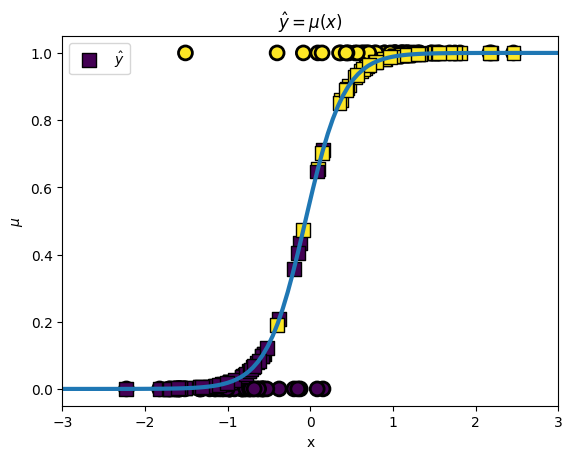

In [100]:
plt.plot(xx,mu,lw=3)
plt.scatter(X0,y,c=y,s=100,edgecolor='k',lw=2)
# latex 문
plt.scatter(X0,logit_res.predict(X),label=r"$\hat{y}$",marker='s',c=y,s=100,edgecolor='k',lw=1)
plt.xlim(-3,3)
plt.xlabel('x')
plt.ylabel(r'$\mu$')
plt.title(r'$\hat{y} = \mu(x)$')
plt.legend()
plt.show()

In [101]:
from sklearn.metrics import log_loss
y_hat=logit_res.predict(X)
log_loss(y,y_hat,normalize=False)

16.084355200413036

In [102]:
# LL-NULL: 종속변수가 없을 때 그리고 정상일 때
mu_null = np.sum(y)/len(y)
mu_null

0.51

In [103]:
y_null=np.ones_like(y)*mu_null
log_loss(y,y_null,normalize=False)

69.29471672244784

In [104]:
1-(log_loss(y,y_hat)/log_loss(y,y_null))

0.7678848264170398

In [111]:
# 혼동행렬
# 예측결과가 범주형인 경우(이산적)
# 정분류,오분류, 정밀도, 민감도, 특이도
from sklearn.metrics import (confusion_matrix,accuracy_score)
# 결과가 확률로 출력 => class 값으로 변경

cm=confusion_matrix(y,list(map(round,y_hat)))
print('Confusion Matrix : \n',cm)

print('Test accuracy = ', accuracy_score(y,list(map(round,y_hat))))

Confusion Matrix : 
 [[47  2]
 [ 3 48]]
Test accuracy =  0.95


In [ ]:
print(y)
print(y_hat)

print(list(map(round,y_hat)))

In [132]:
# 문제
data_med=sm.datasets.get_rdataset('MedGPA',package='Stat2Data')
df_med=data_med.data
df_med.tail()
# BCPM : Bio, Chem, Phy, Math 의 평균학점
# GPA : 전체 과목의 평균학점
# VR : Verbal reasoning
# PS : Physical science
# WS : Writing sample
# BS : Biological sciences
# Apps: 의대 지원횟수


# logistic 회귀 분석을 이용해서 Acceptance여부를 판별하는 모델

df_med=df_med.dropna()
y=df_med.iloc[:,1]
X0=df_med.iloc[:,3:]
X=sm.add_constant(X0)
logit_mod=sm.Logit(y,X)
result = logit_mod.fit()
result.summary()

         Current function value: 0.309382
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            7
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.5496
Time:                        05:47:26   Log-Likelihood:                -16.707
converged:                      False   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 8.928e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -53.0858     15.530     -3.418      0.001     -83.524     -22.647
BCPM         -10.5558      6.344     -1.664      0.096     -22.990       1.879
GPA           18.1264      8.057      2.250      0.024       2.335      33.918
VR            -0.1769        nan        nan        nan         nan         nan
PS             0.5601        nan        nan        nan         nan         nan
WS            -1.2668        nan        nan        nan         nan         nan
BS             1.3464        nan        nan        nan         nan         nan
MCAT           0.4622        nan        nan        nan         nan         nan
Apps           0.1737      0.126      1.379      0.168      -0.073       0.420
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [117]:
df_med.iloc[:,3:].tail()

,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,2.41,2.72,8,8,8.0,8,32,7
51,3.51,3.56,11,8,6.0,9,34,6
52,3.43,3.48,7,10,7.0,10,34,14
53,2.61,2.80,7,5,NaN,6,18,6
54,3.36,3.44,11,11,8.0,9,39,1


In [127]:
df_med

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
0,D,0,F,3.59,3.62,11,9,9.0,9,38,5
1,A,1,M,3.75,3.84,12,13,8.0,12,45,3
2,A,1,F,3.24,3.23,9,10,5.0,9,33,19
3,A,1,F,3.74,3.69,12,11,7.0,10,40,5
4,A,1,F,3.53,3.38,9,11,4.0,11,35,11
5,A,1,M,3.59,3.72,10,9,7.0,10,36,5
6,A,1,M,3.85,3.89,11,12,6.0,11,40,5
7,D,0,M,3.26,3.34,11,11,8.0,9,39,7
8,A,1,F,3.74,3.71,8,10,6.0,11,35,5
9,A,1,F,3.86,3.89,9,9,6.0,10,34,11


In [133]:
df_med=df_med.dropna()
model_med=sm.Logit.from_formula(
    'Acceptance ~ Sex+BCPM+GPA+VR+PS+WS+BS+Apps',df_med
)
result_med=model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.5913
Time:                        06:04:22   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

In [ ]:
result_med.predict(df_med)

In [ ]:
df_med['Prediction']=result_med.predict(df_med)
sns.boxplot(x='Acceptance',y='Prediction',data=df_med)
plt.show()

In [136]:
from sklearn.metrics import (confusion_matrix,accuracy_score)
cm= confusion_matrix(df_med['Acceptance'],list(map(round,df_med['Prediction'])))
print('Confusion Matrix : \n',cm)
print('Test accuracy = ', accuracy_score(df_med['Acceptance'],list(map(round,df_med['Prediction']))))

Confusion Matrix : 
 [[21  3]
 [ 3 27]]
Test accuracy =  0.8888888888888888


In [ ]:
# 시계열 분석
!pip install prophet
# prophet 모델 
# 가법모형(가법모형 +, 승법모형 *): 변수들의 관계가 +로 종속변수에 영향을 미침
# 비 선형을 지원(non-linear trend)
# 계절성을 고려한다(SARIMA,SARIMAX)
# 결측치에 강건하다
# 예외를 잘 핸들한다.

In [157]:
from prophet import Prophet
df=pd.read_csv('/content/drive/MyDrive/daejeon_1/AirPassengers.csv')
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [150]:
df.describe()

,AirPassengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [159]:
df['Month']=pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [160]:
df=df.rename(columns={'Month':'ds',
                      'AirPassengers':'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


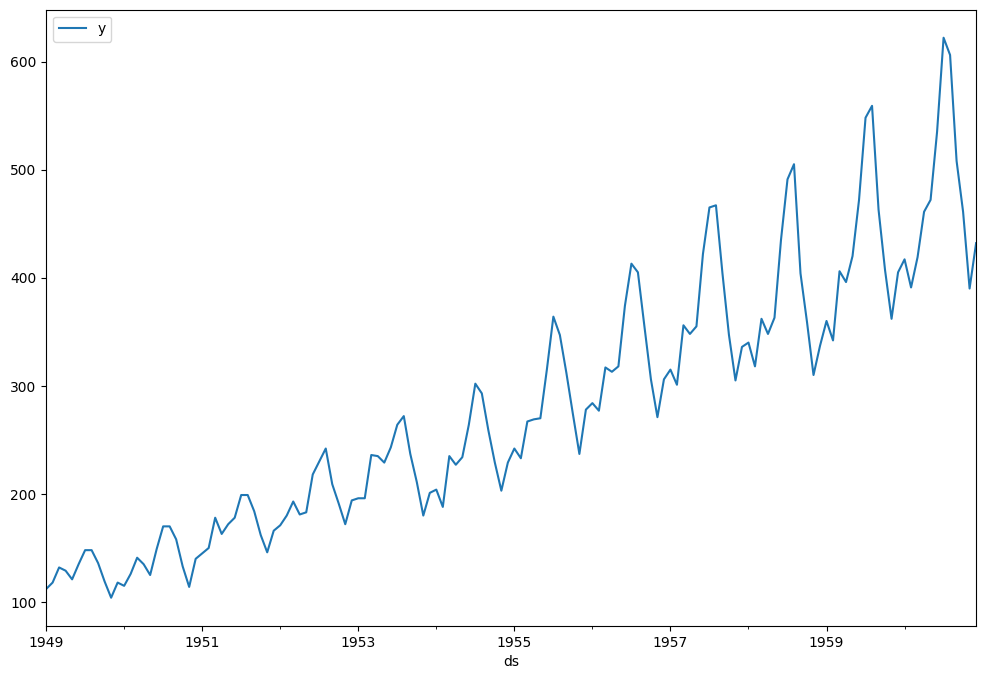

In [161]:
from matplotlib import pyplot as plt
ax=df.set_index('ds').plot(figsize=(12,8))
plt.show()

In [162]:
my_model=Prophet(interval_width=0.95)
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbjblm/a58bwtvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbjblm/nsw02zct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30178', 'data', 'file=/tmp/tmp0czbjblm/a58bwtvz.json', 'init=/tmp/tmp0czbjblm/nsw02zct.json', 'output', 'file=/tmp/tmp0czbjblm/prophet_modelsntzpj6g/prophet_model-20230516062828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [163]:
future_dates=my_model.make_future_dataframe(periods=36,freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [164]:
forecast=my_model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.252248,608.541548,690.311858
176,1963-09-01,603.005317,560.176189,647.483317
177,1963-10-01,566.772432,522.734344,609.765045
178,1963-11-01,534.950059,489.082633,578.557680
179,1963-12-01,564.567572,522.941583,609.333353


In [ ]:
my_model.plot(forecast,uncertainty=True)

In [ ]:
my_model.plot_components(forecast)

In [167]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date='2010-1-1'
end_date='2022-12-31'
KIA=data.get_data_yahoo('000270.KS',start_date,end_date)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,20100.0,20900.0,20000.0,20800.0,15451.242188,4277954
2010-01-05,20850.0,21100.0,19650.0,19650.0,14596.967773,11855825
2010-01-06,19750.0,20150.0,19300.0,19850.0,14745.541016,6916200
2010-01-07,19800.0,19850.0,18900.0,18950.0,14076.975586,5865251
2010-01-08,18750.0,19350.0,18450.0,19350.0,14374.113281,7152726


<Axes: xlabel='Date'>

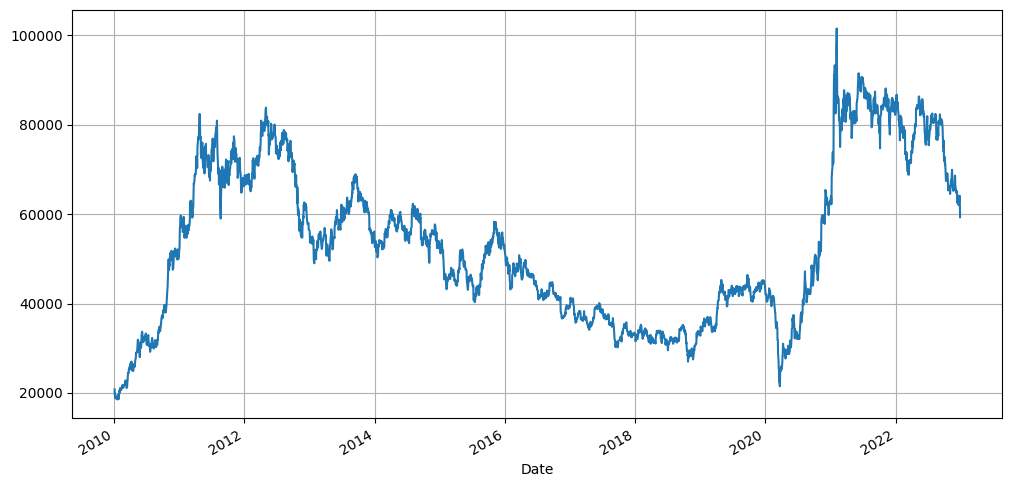

In [169]:
# 문제
# 종가를 시각화 해보시오
KIA['Close'].plot(figsize=(12,6),grid=True)

In [170]:
KIA_trunc=KIA[:'2020-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,20100.0,20900.0,20000.0,20800.0,15451.242188,4277954
2010-01-05,20850.0,21100.0,19650.0,19650.0,14596.967773,11855825
2010-01-06,19750.0,20150.0,19300.0,19850.0,14745.541016,6916200
2010-01-07,19800.0,19850.0,18900.0,18950.0,14076.975586,5865251
2010-01-08,18750.0,19350.0,18450.0,19350.0,14374.113281,7152726
...,...,...,...,...,...,...
2020-12-23,60000.0,62000.0,59500.0,61400.0,55095.062500,1658263
2020-12-24,61800.0,62800.0,61200.0,61700.0,55364.257812,1271051
2020-12-28,62200.0,63700.0,61700.0,62800.0,56351.304688,2282079


In [171]:
df=pd.DataFrame({'ds':KIA_trunc.index,'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-01-04,20800.0
1,2010-01-05,19650.0
2,2010-01-06,19850.0
3,2010-01-07,18950.0
4,2010-01-08,19350.0


In [172]:
m=Prophet(daily_seasonality=True)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbjblm/nkip8nbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbjblm/7mk2u_os.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23334', 'data', 'file=/tmp/tmp0czbjblm/nkip8nbg.json', 'init=/tmp/tmp0czbjblm/7mk2u_os.json', 'output', 'file=/tmp/tmp0czbjblm/prophet_modelomb9zgcl/prophet_model-20230516064036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:40:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [173]:
future=m.make_future_dataframe(periods=730)
future.tail()

,ds
3438,2022-12-26
3439,2022-12-27
3440,2022-12-28
3441,2022-12-29
3442,2022-12-30


In [174]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3438,2022-12-26,57935.030146,36865.615171,81320.280476
3439,2022-12-27,57965.532141,36413.728381,81215.978243
3440,2022-12-28,57862.499231,35305.555173,80861.742342
3441,2022-12-29,57674.212390,34885.372488,80274.237943
3442,2022-12-30,57541.671509,35504.631263,80044.401932


In [ ]:
m.plot(forecast)

In [ ]:
m.plot_components(forecast)

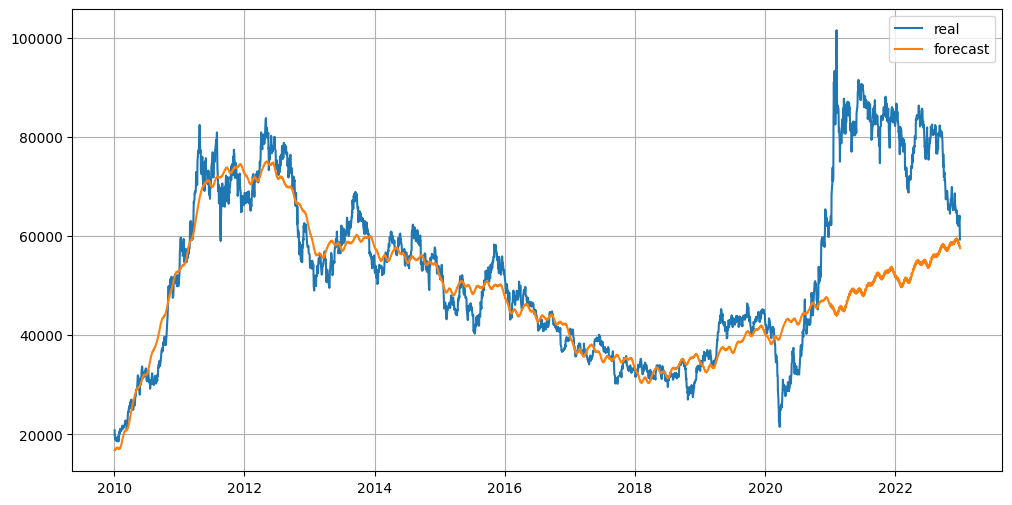

In [177]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index,KIA['Close'],label='real')
plt.plot(forecast['ds'],forecast['yhat'],label='forecast')
plt.grid()
plt.legend()
plt.show()